In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

dic_ee_size_h = {}
dic_neg_size_h = {}
dic_pos_size_h = {}
with open("/mnt/project/exonhancer/ZENODO_REPO/1_easy_access/ExonsEnhancers_all_species/hg38_EE.bed") as file:
    for line in file:    
        dic_ee_size_h[line.strip().split()[3]] = int(line.strip().split()[2])-int(line.strip().split()[1])
with open("/mnt/project/exonhancer/ZENODO_REPO/Control_selection/control_neg_NoTF_NoTSS_TES_prom.tsv") as file:
    for line in file:    
        dic_neg_size_h[line.strip().split()[3]] = int(line.strip().split()[2])-int(line.strip().split()[1])
with open("/mnt/project/exonhancer/ZENODO_REPO/Control_selection/control_pos_enhD_NoTSS_TES_10TFmin.tsv") as file:
    for line in file:    
        dic_pos_size_h[line.strip().split()[3]] = int(line.strip().split()[2])-int(line.strip().split()[1])

dic_ee_size_d = {}
dic_neg_size_d = {}
dic_pos_size_d = {}
with open("/mnt/project/exonhancer/ZENODO_REPO/1_easy_access/ExonsEnhancers_all_species/dm6_EE.bed") as file:
    for line in file:    
        dic_ee_size_d[line.strip().split()[3]] = int(line.strip().split()[2])-int(line.strip().split()[1])
with open("/mnt/project/exonhancer/ZENODO_REPO/Control_selection/dm6_control_neg_NoTF_NoTSS_TES.tsv") as file:
    for line in file:    
        dic_neg_size_d[line.strip().split()[3]] = int(line.strip().split()[2])-int(line.strip().split()[1])
with open("/mnt/project/exonhancer/ZENODO_REPO/Control_selection/dm6_control_pos_NoTSS_TES_10TFmin.tsv") as file:
    for line in file:    
        dic_pos_size_d[line.strip().split()[3]] = int(line.strip().split()[2])-int(line.strip().split()[1])

dic_ee_size_m = {}
dic_neg_size_m = {}
dic_pos_size_m = {}
with open("/mnt/project/exonhancer/ZENODO_REPO/1_easy_access/ExonsEnhancers_all_species/mm39_EE.bed") as file:
    for line in file:    
        dic_ee_size_m[line.strip().split()[3]] = int(line.strip().split()[2])-int(line.strip().split()[1])
with open("/mnt/project/exonhancer/ZENODO_REPO/Control_selection/mm39_control_neg_NoTF_NoTSS_TES_prom.tsv") as file:
    for line in file:    
        dic_neg_size_m[line.strip().split()[3]] = int(line.strip().split()[2])-int(line.strip().split()[1])
with open("/mnt/project/exonhancer/ZENODO_REPO/Control_selection/mm39_control_pos_enhD_NoTSS_TES_10TFmin.tsv") as file:
    for line in file:    
        dic_pos_size_m[line.strip().split()[3]] = int(line.strip().split()[2])-int(line.strip().split()[1])

dic_ee_size_t = {}
dic_neg_size_t = {}
dic_pos_size_t = {}
with open("/mnt/project/exonhancer/ZENODO_REPO/1_easy_access/ExonsEnhancers_all_species/tair10_EE.bed") as file:
    for line in file:    
        dic_ee_size_t[line.strip().split()[3]] = int(line.strip().split()[2])-int(line.strip().split()[1])
with open("/mnt/project/exonhancer/ZENODO_REPO/Control_selection/tair10_control_neg_NoTF_NoTSS_TES.tsv") as file:
    for line in file:    
        dic_neg_size_t[line.strip().split()[3]] = int(line.strip().split()[2])-int(line.strip().split()[1])
with open("/mnt/project/exonhancer/ZENODO_REPO/Control_selection/tair10_control_pos_NoTSS_TES_10TFmin.tsv") as file:
    for line in file:    
        dic_pos_size_t[line.strip().split()[3]] = int(line.strip().split()[2])-int(line.strip().split()[1])

In [6]:
### divide each number to get the number of tfbs by kb
#hsap        
dic_400_kb_h = {"EE":[],"Ctrl-":[],"Ctrl+":[]}
with open("/mnt/project/exonhancer/ZENODO_REPO/TFBS_in_EE/ee_ovlp_jaspar_hg38_2024") as file:
    val = True
    cpt_400 = 0
    for line in file:    
        if line.strip().split()[0] != val:
            if val != True:
                dic_400_kb_h["EE"].append(cpt_400/(dic_ee_size_h[line.strip().split()[0]]/1000))

            val = line.strip().split()[0]
            if int(line.strip().split()[1]) >= 400:
                cpt_400 = 1
            else:
                cpt_400 = 0
        else:
            if int(line.strip().split()[1]) >= 400:
                cpt_400 += 1

with open("/mnt/project/exonhancer/ZENODO_REPO/TFBS_in_EE/ctrlneg_ovlp_jaspar_hg38_2024") as file:
    val = True
    cpt_400 = 0
    for line in file:    
        if line.strip().split()[0] != val:
            if val != True:
                dic_400_kb_h["Ctrl-"].append(cpt_400/(dic_neg_size_h[line.strip().split()[0]]/1000))

            val = line.strip().split()[0]
            if int(line.strip().split()[1]) >= 400:
                cpt_400 = 1
            else:
                cpt_400 = 0
        else:
            if int(line.strip().split()[1]) >= 400:
                cpt_400 += 1

with open("/mnt/project/exonhancer/ZENODO_REPO/TFBS_in_EE/ctrlpos_ovlp_jaspar_hg38_2024") as file:
    val = True
    cpt_400 = 0
    for line in file:    
        if line.strip().split()[0] != val:
            if val != True:
                dic_400_kb_h["Ctrl+"].append(cpt_400/(dic_pos_size_h[line.strip().split()[0]]/1000))

            val = line.strip().split()[0]
            if int(line.strip().split()[1]) >= 400:
                cpt_400 = 1
            else:
                cpt_400 = 0
        else:
            if int(line.strip().split()[1]) >= 400:
                cpt_400 += 1

In [7]:
### divide each number to get the number of tfbs by kb
#tair        
dic_400_kb_t = {"EE":[],"Ctrl-":[],"Ctrl+":[]}
with open("/mnt/project/exonhancer/ZENODO_REPO/TFBS_in_EE/ee_ovlp_jaspar_tair10_2024") as file:
    val = True
    cpt_400 = 0
    for line in file:    
        if line.strip().split()[0] != val:
            if val != True:
                dic_400_kb_t["EE"].append(cpt_400/(dic_ee_size_t[line.strip().split()[0]]/1000))

            val = line.strip().split()[0]
            if int(line.strip().split()[1]) >= 400:
                cpt_400 = 1
            else:
                cpt_400 = 0
        else:
            if int(line.strip().split()[1]) >= 400:
                cpt_400 += 1

with open("/mnt/project/exonhancer/ZENODO_REPO/TFBS_in_EE/ctrlneg_ovlp_jaspar_tair10_2024") as file:
    val = True
    cpt_400 = 0
    for line in file:    
        if line.strip().split()[0] != val:
            if val != True:
                dic_400_kb_t["Ctrl-"].append(cpt_400/(dic_neg_size_t[line.strip().split()[0]]/1000))

            val = line.strip().split()[0]
            if int(line.strip().split()[1]) >= 400:
                cpt_400 = 1
            else:
                cpt_400 = 0
        else:
            if int(line.strip().split()[1]) >= 400:
                cpt_400 += 1

with open("/mnt/project/exonhancer/ZENODO_REPO/TFBS_in_EE/ctrlpos_ovlp_jaspar_tair10_2024") as file:
    val = True
    cpt_400 = 0
    for line in file:    
        if line.strip().split()[0] != val:
            if val != True:
                dic_400_kb_t["Ctrl+"].append(cpt_400/(dic_pos_size_t[line.strip().split()[0]]/1000))

            val = line.strip().split()[0]
            if int(line.strip().split()[1]) >= 400:
                cpt_400 = 1
            else:
                cpt_400 = 0
        else:
            if int(line.strip().split()[1]) >= 400:
                cpt_400 += 1

In [8]:
### divide each number to get the number of tfbs by kb
#dm        
dic_400_kb_d = {"EE":[],"Ctrl-":[],"Ctrl+":[]}
with open("/mnt/project/exonhancer/ZENODO_REPO/TFBS_in_EE/ee_ovlp_jaspar_dm6_2024") as file:
    val = True
    cpt_400 = 0
    for line in file:    
        if line.strip().split()[0] != val:
            if val != True:
                dic_400_kb_d["EE"].append(cpt_400/(dic_ee_size_d[line.strip().split()[0]]/1000))

            val = line.strip().split()[0]
            if int(line.strip().split()[1]) >= 400:
                cpt_400 = 1
            else:
                cpt_400 = 0
        else:
            if int(line.strip().split()[1]) >= 400:
                cpt_400 += 1

with open("/mnt/project/exonhancer/ZENODO_REPO/TFBS_in_EE/ctrlneg_ovlp_jaspar_dm6_2024") as file:
    val = True
    cpt_400 = 0
    for line in file:    
        if line.strip().split()[0] != val:
            if val != True:
                dic_400_kb_d["Ctrl-"].append(cpt_400/(dic_neg_size_d[line.strip().split()[0]]/1000))

            val = line.strip().split()[0]
            if int(line.strip().split()[1]) >= 400:
                cpt_400 = 1
            else:
                cpt_400 = 0
        else:
            if int(line.strip().split()[1]) >= 400:
                cpt_400 += 1

with open("/mnt/project/exonhancer/ZENODO_REPO/TFBS_in_EE/ctrlpos_ovlp_jaspar_dm6_2024") as file:
    val = True
    cpt_400 = 0
    for line in file:    
        if line.strip().split()[0] != val:
            if val != True:
                dic_400_kb_d["Ctrl+"].append(cpt_400/(dic_pos_size_d[line.strip().split()[0]]/1000))

            val = line.strip().split()[0]
            if int(line.strip().split()[1]) >= 400:
                cpt_400 = 1
            else:
                cpt_400 = 0
        else:
            if int(line.strip().split()[1]) >= 400:
                cpt_400 += 1

In [9]:
### divide each number to get the number of tfbs by kb
#mm        
dic_400_kb_m = {"EE":[],"Ctrl-":[],"Ctrl+":[]}
with open("/mnt/project/exonhancer/ZENODO_REPO/TFBS_in_EE/ee_ovlp_jaspar_mm39_2024") as file:
    val = True
    cpt_400 = 0
    for line in file:    
        if line.strip().split()[0] != val:
            if val != True:
                dic_400_kb_m["EE"].append(cpt_400/(dic_ee_size_m[line.strip().split()[0]]/1000))

            val = line.strip().split()[0]
            if int(line.strip().split()[1]) >= 400:
                cpt_400 = 1
            else:
                cpt_400 = 0
        else:
            if int(line.strip().split()[1]) >= 400:
                cpt_400 += 1

with open("/mnt/project/exonhancer/ZENODO_REPO/TFBS_in_EE/ctrlneg_ovlp_jaspar_mm39_2024") as file:
    val = True
    cpt_400 = 0
    for line in file:    
        if line.strip().split()[0] != val:
            if val != True:
                dic_400_kb_m["Ctrl-"].append(cpt_400/(dic_neg_size_m[line.strip().split()[0]]/1000))

            val = line.strip().split()[0]
            if int(line.strip().split()[1]) >= 400:
                cpt_400 = 1
            else:
                cpt_400 = 0
        else:
            if int(line.strip().split()[1]) >= 400:
                cpt_400 += 1

with open("/mnt/project/exonhancer/ZENODO_REPO/TFBS_in_EE/ctrlpos_ovlp_jaspar_mm39_2024") as file:
    val = True
    cpt_400 = 0
    for line in file:    
        if line.strip().split()[0] != val:
            if val != True:
                dic_400_kb_m["Ctrl+"].append(cpt_400/(dic_pos_size_m[line.strip().split()[0]]/1000))

            val = line.strip().split()[0]
            if int(line.strip().split()[1]) >= 400:
                cpt_400 = 1
            else:
                cpt_400 = 0
        else:
            if int(line.strip().split()[1]) >= 400:
                cpt_400 += 1

M.mus_cEEs v.s. M.mus_Ctrl+: t-test independent samples with Bonferroni correction, P_val=4.805e-170 stat=2.790e+01
D.mel_Ctrl- v.s. D.mel_cEEs: t-test independent samples with Bonferroni correction, P_val=1.443e-13 stat=7.672e+00
D.mel_cEEs v.s. D.mel_Ctrl+: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=-4.498e+01
A.tha_Ctrl- v.s. A.tha_cEEs: t-test independent samples with Bonferroni correction, P_val=3.885e-15 stat=-8.124e+00
A.tha_cEEs v.s. A.tha_Ctrl+: t-test independent samples with Bonferroni correction, P_val=6.550e-133 stat=-2.485e+01
H.sap_Ctrl- v.s. H.sap_cEEs: t-test independent samples with Bonferroni correction, P_val=8.526e-27 stat=-1.092e+01
H.sap_cEEs v.s. H.sap_Ctrl+: t-test independent samples with Bonferroni correction, P_val=0.000e+00 stat=3.848e+01
M.mus_Ctrl- v.s. M.mus_cEEs: t-test independent samples with Bonferroni correction, P_val=1.895e-15 stat=-8.206e+00


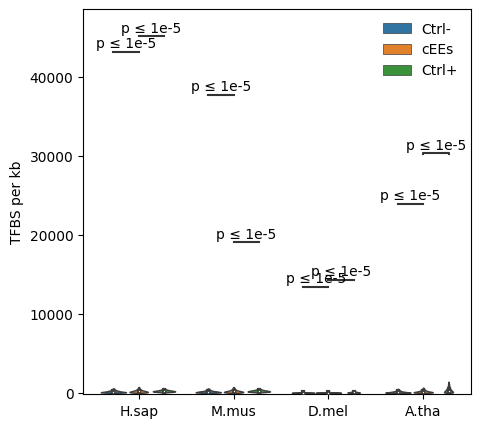

In [ ]:
### PLOT
# Function to remove outliers based on IQR
def remove_outliers_iqr(group):
    Q1 = group['TFBS'].quantile(0.25)
    Q3 = group['TFBS'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtering the group to keep only non-outliers
    return group[(group['TFBS'] >= lower_bound) & (group['TFBS'] <= upper_bound)]

dataf = [
{"Species":"H.sap","Dataset":"Ctrl-","TFBS":dic_400_kb_h["Ctrl-"]},
{"Species":"H.sap","Dataset":"cEEs","TFBS":dic_400_kb_h["EE"]},
{"Species":"H.sap","Dataset":"Ctrl+","TFBS":dic_400_kb_h["Ctrl+"]},

{"Species":"M.mus","Dataset":"Ctrl-","TFBS":dic_400_kb_m["Ctrl-"]},
{"Species":"M.mus","Dataset":"cEEs","TFBS":dic_400_kb_m["EE"]},
{"Species":"M.mus","Dataset":"Ctrl+","TFBS":dic_400_kb_m["Ctrl+"]},

{"Species":"D.mel","Dataset":"Ctrl-","TFBS":dic_400_kb_d["Ctrl-"]},
{"Species":"D.mel","Dataset":"cEEs","TFBS":dic_400_kb_d["EE"]},
{"Species":"D.mel","Dataset":"Ctrl+","TFBS":dic_400_kb_d["Ctrl+"]},

{"Species":"A.tha","Dataset":"Ctrl-","TFBS":dic_400_kb_t["Ctrl-"]},
{"Species":"A.tha","Dataset":"cEEs","TFBS":dic_400_kb_t["EE"]},
{"Species":"A.tha","Dataset":"Ctrl+","TFBS":dic_400_kb_t["Ctrl+"]},
]

df = pd.DataFrame(dataf)
df_exploded = df.explode('TFBS')
df_exploded['TFBS'] = pd.to_numeric(df_exploded['TFBS'])

df_no_outliers = df_exploded.groupby(['Species', 'Dataset']).apply(remove_outliers_iqr).reset_index(drop=True)

dataset_order = ['Ctrl-', 'cEEs', 'Ctrl+']
df_no_outliers['Dataset'] = pd.Categorical(df_no_outliers['Dataset'], categories=dataset_order, ordered=True)

plt.figure(figsize=(5,5))

ax = sns.violinplot(data=df_no_outliers, x="Species", y="TFBS", hue="Dataset", order=["H.sap","M.mus","D.mel","A.tha"],flierprops={"marker":"o", 'markersize': 1},linewidth=1)

# STATS
from statannot import add_stat_annotation

box_pairs = [
    (("H.sap", "Ctrl-"), ("H.sap", "cEEs")),
    (("H.sap", "Ctrl+"), ("H.sap", "cEEs")),
    (("M.mus", "Ctrl-"), ("M.mus", "cEEs")),
    (("M.mus", "Ctrl+"), ("M.mus", "cEEs")),
    (("D.mel", "Ctrl-"), ("D.mel", "cEEs")),
    (("D.mel", "Ctrl+"), ("D.mel", "cEEs")),
    (("A.tha", "Ctrl-"), ("A.tha", "cEEs")),
    (("A.tha", "Ctrl+"), ("A.tha", "cEEs"))
]

# Validate box pairs with the actual categories in your data
valid_box_pairs = [(pair[0], pair[1]) for pair in box_pairs 
                   if pair[0][0] in df_no_outliers["Species"].unique() and pair[1][0] in df_no_outliers["Species"].unique() 
                   and pair[0][1] in df_no_outliers["Dataset"].unique() and pair[1][1] in df_no_outliers["Dataset"].unique()]

# Add statistical annotations
add_stat_annotation(ax, data=df_no_outliers, x="Species", y="TFBS", hue="Dataset", order=["H.sap","M.mus","D.mel","A.tha"],
                    box_pairs=valid_box_pairs,
                    test='t-test_ind', text_format='simple', loc='inside', verbose=1)

ax.set_ylabel("TFBS per kb") 
ax.set_xlabel(None)

plt.legend(frameon=False,title=None)

plt.savefig("/home/mouren/Images/supplementary_figures/supp_fig2/JASPAR_TFBS_all_species.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/supplementary_figures/supp_fig2/JASPAR_TFBS_all_species.png", format="png", bbox_inches="tight", dpi=450)

plt.show()